In [2]:
import numpy as np
import numpy.random as npr

import sympy as sp

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

a) Find $c$ for $f_X(x)$ to be a valid density function.

(It must integrate to 1)

In [3]:
c,x=sp.symbols('c,x')

In [4]:
sp.integrate(c*x**4,(x,-1,1))

2*c/5

In [5]:
sp.solve(2*c/5-1)

[5/2]

So, $c=5/2$

b) Find the distribution function of $X$.

$$
F_X(x)= \int_{-\infty}^{x} f_x(u) du
= \int_{-1}^{x} \frac{5}{2} u^4 du, -1 \le x <= 1
$$



In [6]:
u=sp.symbols('u')

In [7]:
sp.integrate(sp.Rational(5,2)*u**4,(u,-1,x))

x**5/2 + 1/2

$$
F_X(x) =
\begin{cases}
0, & x< -1 \\
\frac{x^5+1}{2}, & -1 \le x \le 1 \\
1 & x > 1
\end{cases}
$$

c) Find the mean of $X$

$$
\begin{align}
E[X] &= \int_{-\infty}^{\infty} x f_X(x) ~dx \\
&= \int_{-1}^{1}  x \cdot \frac{5}{2} x^4 ~dx 
\end{align}
$$

In [8]:
sp.integrate(x*sp.Rational(5,2)*x**4,(x,-1,1))

0

(We could have determined this without the math -- the density is symmetric.)

d) Find the variance of $X$.

$$
\begin{align}
\operatorname{Var}[X] &= E[X^2] -E[X]^2 = E[X^2]\\
&= \int_{-\infty}^{\infty} x^2 f_X(x) ~dx\\
&= \int_{-1}^{1} x^2 \frac{5}{2}{x^4}~dx
\end{align}
$$

In [9]:
sp.integrate(x**2*sp.Rational(5,2)*x**4,(x,-1,1))
5/7

0.7142857142857143

e) Find $E[(X-1)^2]$

$$
E[(X-1)^2] = E[X^2 -2*X +1] = E[X^2] - 2E[X] +1
$$

From above $E[X^2] = \operatorname{Var}[X]=5/7$ and $E[X]=0$, so

$$
E[(X-1)^2] = \frac{5/7} + 2(0)+1 = \frac{12}{7}
$$

We can also use the LOTUS rule directly in sympy:


In [9]:
sp.integrate((x-1)**2*sp.Rational(5,2)*x**4,(x,-1,1))

12/7

## Problem 2

In [10]:
def Q(x):
    return stats.norm.sf(x)

a) If the mean exam score is 82 and the variance is 64, find the probabilities of A, B, and C.

$$ P(A) = P(X> 85) = Q \left( \frac{85-82}{8} \right)$$

$$ P(C) = P(X< 70) = Q \left( \frac{82-70}{8} \right)$$

$$ P(B) = 1 -P(A) - P(C)$$

In [11]:
pA= Q((85-82)/8)
pC= Q((82-70)/8)
pB=1- pA -pC

In [12]:
print("P(A)=",pA)
print("P(B)=",pB)
print("P(C)=",pC)

P(A)= 0.3538302333272762
P(B)= 0.5793625654038657
P(C)= 0.06680720126885807


(b) If a student is confident that he made at least an 80 on the exam, what is the probability that the student made an A on the exam?

We are looking for the probability of an A given that $X\ge 80$:

$$
\begin{align}
P(A| X \ge 80) &= \frac{P(A \cap X \ge 80)}{P(X \ge 80)}\\
&=\frac{P(X \ge 85 \cap X \ge 80)}{P(X \ge 80)}\\
&=\frac{P(X \ge 85)}{P(X \ge 80)}
\end{align}
$$

$$
P(X \ge 85) = Q \left( \frac{85-82}{8} \right)$$

$$
P(X \ge 80) = 1- Q \left(\frac{82-80}{8} \right)$$

Thus, the probability is:

In [13]:
Q((85-82)/8)/(1-Q((82-80)/8))

0.5909913060024449

(c) Suppose that the professor instead wants to adjust the difficulty of the problems of the exam so that the probability of an A is 0.25 and the probability of a B is 0.52. What should the values of the mean and variance be to achieve these probabilities?

$$
P(A) = Q\left( \frac{85-\mu}{\sigma} \right)= 0.25
$$
$$
\frac{85-\mu}{\sigma} = Q^{-1} (0.25)
$$


In [14]:
def Qinv(p):
    return stats.norm.isf(p)

In [15]:
Qinv(0.25)

0.6744897501960817

$$
85- \mu = 0.675 \sigma
$$

Knowing just $P(A)$ is not enough. Again, $P(C)$ is simpler than $P(B)$, so let's use that:

$$
\begin{align}
P(C) &= 1- P(A) - P(B)\\
&= 1- 0.25 -0.52 \\
&= 0.23
\end{align}
$$

$$
P(C) = Q \left( \frac{\mu-70}{\sigma} \right) = 0.23
$$
$$
\frac{\mu-70}{\sigma} = Q^{-1} (0.23)
$$


In [16]:
Qinv(0.23)

0.7388468491852137

$$
\mu -70 = 0.739 \sigma
$$

Reformulating as a matrix equation (we could easily solve directly, but then I wouldn't get to show you solving linear equations with numpy):
$$
\left[
\begin{matrix}
1 & 0.675\\
1 & -0.739 
\end{matrix}
\right]
\left[
\begin{matrix}
\mu\\
\sigma
\end{matrix}
\right]
= 
\left[
\begin{matrix}
85 \\
70
\end{matrix}
\right]
$$

In [17]:
A=np.array([[1, 0.675],
            [1, -0.739]])

In [18]:
import numpy.linalg as npl

In [20]:
npl.inv(A) @ np.array([[85],[70]])

array([[77.83946252],
       [10.60820368]])

The mean should be set to $77.84$ and the variance should be set to 
$(10.610)^2$.

Let's confirm:
$$ P(A) = P(X> 85) = Q \left( \frac{85-\mu}{\sigma} \right)$$

$$ P(C) = P(X< 70) = Q \left( \frac{\mu-70}{\sigma} \right)$$

$$ P(B) = 1 -P(A) - P(C)$$

In [21]:
mu=77.84
sigma=10.610

pA=Q((85-mu)/sigma)
pC=Q((mu-70)/sigma)
pB=1-pA-pC

In [22]:
print("P(A)=",pA)
print("P(B)=",pB)
print("P(C)=",pC)

P(A)= 0.24989028101259186
P(B)= 0.520133613197442
P(C)= 0.2299761057899662


## Problem 3

(a) Which of $E[X]$ or $E[Y]$ do you think is larger? Why?

$E[Y]$ should be larger. For example, the probability of choosing the the box with the most chips when choosing a box at random is $1/4=0.25$. However, when choosing a chip at random, the probability of choosing a chip from the box with the most chips is $$500/(250+300+400+500) \approx 0.345$$


(b) Compute $E[X]$ and $E[Y]$.

$$
\begin{align}
E[X] &= 250 \left(\frac 1 4 \right) + 300 \left(\frac 1 4 \right) +400 \left(\frac 1 4 \right) + 500 \left(\frac 1 4 \right) \\
& = 362.5
\end{align}
$$

Let the boxes with 250, 300, 400, and 500 chips be denoted by $A$, $B$, $C$, and $D$, respectively. Then when choosing a chip at random, the probability that it comes from a given box is equal to the number of chips in the box divided by the total number of chips, 250+300+400+500 = 1450$:

$$
\begin{align}
P(A) &= \frac{250}{1450} \approx 0.172 \\
P(B) &= \frac{300}{1450} \approx 0.207 \\
P(C) &= \frac{400}{1450} \approx 0.276 \\
P(D) &= \frac{500}{1450} \approx 0.345 \\
\end{align}
$$

Then
$$
\begin{align}
E[Y] &= 250 P(A) + 300 P(B) + 400 P(C) + 500 P(D) \\
&\approx 387.9
\end{align}
$$

## Problem 4

(a) What is the probability that there will be at least one disturbance in a 1 minute period?

Model as Poisson RV $X$ with $\lambda = 30/\mbox{hour}$ or, equivalently $\lambda= 0.5/\mbox{minute}$

You can use either, we just need to measure both the amount of time and the rate in the same units

Let's use minutes. 

Recall that the parameter of the Poisson RV is the average number of events in the specified time or space. It is computed as the product of the rate and time

In [23]:
poiss1=stats.poisson(1*0.5)

In [24]:
poiss1.sf(0) # Remember, 0 is not included so this is 
            # the probability of at least one

0.3934693402873665

(b) What is the probability that there will be at least one disturbance in a 5 minute period?

In [25]:
poiss5=stats.poisson(5*0.5)

In [26]:
poiss5.sf(0)

0.9179150013761012

(c) What is the probability that there will be fewer than 5 disturbances in a 15 minute period?

Since the distribution function $F_X(x)$ is inclusive of $x$, we want $F_X(4)$:

In [27]:
poiss15=stats.poisson(15*0.5)

In [28]:
poiss15.cdf(4)

0.1320618562877206

(d) What is the probability that there will be more than 10 disturbances in a 15 minute period?

In [29]:
poiss15.sf(10)

0.13776201657161194

## Problem 5

5.  If 65% of the population of a large community is in favor of a proposed rise in school taxes, approximate the probability that a random sample of 100 people will contain:

(a) at least 50 who are in favor of the proposition;



Here, we are asked to find an approximation because the analytical calculation of the "exact" value would be very difficult by hand. However, we can compute the solution using scipy.stats:

$p=P($randomly chosen person in favor of tax rise$)=0.65$

$P(\ge \mbox{50 out of 100 people in favor})$ is a binomial probability

$= 1- F_X(49)$, where $X$ is Binomial(100, 0.65)

In [30]:
mybinom=stats.binom(100,0.65)
1-mybinom.cdf(49)

0.9992621667511374

The approximate solution can be found by realizing that the Binomial is a sum of many Bernoulli, and hence it will converge to Gaussian. Let $\widetilde{X}$ denote the Gaussian approximation to $X$. We just need its mean and variance, which is the same as those for $X$. We can get them analytically (from formulas given in class, the book, or online) or using scipy.stats:

$E[X] = Np= (100)(0.65) =65$

$\operatorname{Var}(X) = N p (1-p) = 65 (0.35) = 22.75$

In [31]:
mybinom.mean()

65.0

In [32]:
mybinom.var()

22.75

Then 

$$
P(X \ge 50) \approx P( \widetilde{X} \ge 50) \\
= 1- Q\left(\frac{65-50}{\sqrt{22.75}}\right)
$$

In [33]:
1-Q((65-50)/np.sqrt(22.75)) 

0.9991691527710083

Note that we have 50 in one expression and 49 in the other, which is an inconsistency related to treating something that is discrete as if it were continuous. In practice, the usual approach is to split the difference when using the continuous approximation:

In [34]:
1-Q((65-49.5)/np.sqrt(22.75)) 

0.9994223314054234

(b) between 60 and 70 who are in favor of the proposition?

$$
P(60 \le X \le 70) = P(X \le 70) - P(X \le 59) \\
= F_X(70) - F_X(59)
$$


In [35]:
mybinom.cdf(70)-mybinom.cdf(59)

0.7513790890227081

The approximate value is

In [36]:
1-Q((70.5-65)/np.sqrt(22.75))- Q((65-59.5)/np.sqrt(22.75))

0.7511361250620778

(c) fewer than 75 in favor.

$$
P(X < 75) = P(X \le 74) = F_X(74)
$$

In [37]:
mybinom.cdf(74)

0.978858376346662

In [38]:
1-Q((74.5-65)/np.sqrt(22.75))

0.9768002690645478

## Problem 6

Samples from a certain low noise amplifier are distributed Gaussian
  with mean 0 and variance 1. Samples from the same company's power amplifier
  are Gaussian with mean 0 and variance 4. During a particular day, the chip
  labeler breaks down, but nobody noticed until chips of both types have been
  mixed together.

  Recall that by the "weighted density functions", we refer to the numerator
  of the *a posteriori* probabilities, which is the product of the
  likelihoods and the *a priori* probabilities.

  This problem requires both plotting work (in a Jupyter notebook) and
  analytical work (that I recommend you do by hand on paper).



### a)
First consider that chips of both types are equally likely. Plot the
    weighted density functions in Jupyter notebook.  Vary the regions plotted to zoom in
    on any points necessary to give a reasonable estimate (at least accurated to
    within $\pm$0.25) of the MAP decision regions.
  

In [51]:
X=stats.norm() # Low noise amplifier
Y=stats.norm(scale=2) # Power amplifier

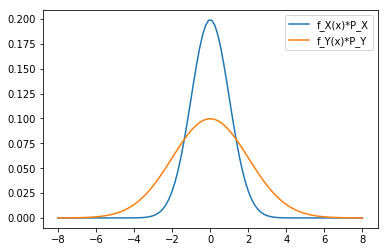

In [50]:
x=np.linspace(-8,8,100)
plt.plot(x,0.5*X.pdf(x), label="f_X(x)*P_X")
plt.plot(x,0.5*Y.pdf(x), label="f_Y(x)*P_Y")
plt.legend()

(-1.4, -1.3)

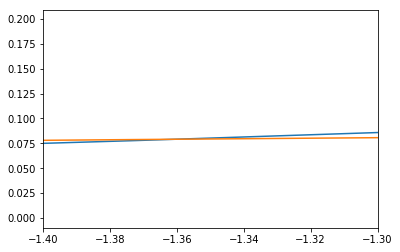

In [46]:
x=np.linspace(-8,8,100)
plt.plot(x,0.5*X.pdf(x))
plt.plot(x,0.5*Y.pdf(x))
plt.xlim([-1.4,-1.3])

Looks like the left-side crossover is at about -1.36. By symmetry, it should be the same on the right side:

(1.3, 1.4)

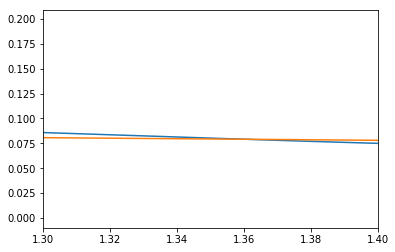

In [47]:
x=np.linspace(-8,8,100)
plt.plot(x,0.5*X.pdf(x))
plt.plot(x,0.5*Y.pdf(x))
plt.xlim([1.3,1.4])

Confirmed. Thus, the MAP decision regions are:

* Power amplifier,  $|X|> 1.36$
* Low-noise amplifier,   $|X| \le 1.36$

### b)
The MAP decision regions in this problem are determined by a set of
    thresholds. (Unlike the case covered in class, there is not just a single
    threshold for each value of the {\it a priori } probabilities.) Give a
    formula for the MAP decision thresholds


* See the separate PDF for the derivation. The value then is computed as:

In [52]:
def crossing (pA):
    return np.sqrt(8/3*np.log(2*pA/(1-pA)))

In [53]:
crossing(0.5)

1.3595559868917453

The estimate using the graphs was very accurate.

### c)

Write a function in your Jupyter notebook that inputs the probability
    that a randomly chosen chip is a low noise amplifier. The function should
    
* plot (using ```plt.plot```) both the weighted density functions 

* calculate the numerical value of the MAP decision thresholds
    
* plot (using \texttt{plt.scatter}) the points where the $x$-values is a MAP decision threshold and the $y$-value is the value of the weighted densities at that MAP decision threshold
    
    


In [62]:
def varmap(p_LNA=0.5):
    x=np.linspace(-8,8,100)
    cross=crossing(p_LNA)

    plt.plot(x,p_LNA*X.pdf(x))
    plt.plot(x,(1-p_LNA)*Y.pdf(x))
    plt.scatter(cross,p_LNA*X.pdf(cross))    
    plt.scatter(-cross,p_LNA*X.pdf(-cross))        
    return cross

### d)

Show the output of your function when  there are equal numbers of each type of amplifier


1.3595559868917453

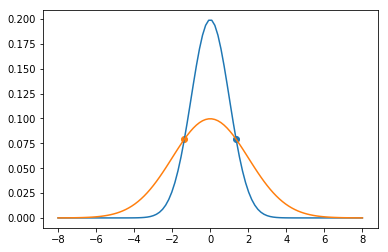

In [63]:
varmap()

### e)

Show the output of your function when there are twice as many power
amplifiers as low-noise amplifiers


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


nan

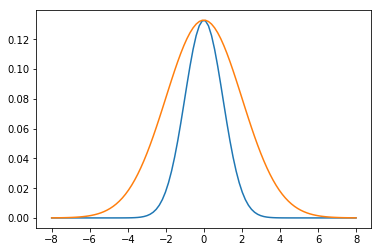

In [64]:
varmap(1/3)

### f)

Show the output of your function when the probability of a randomly
chosen chip being a low-noise amplifier is 0.9


2.7762669217956044

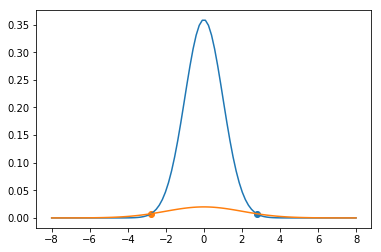

In [65]:
varmap(0.9)

### g)

What happens when the probability of a random chosen chip being a
low-noise amplifier is 0.2? 


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


nan

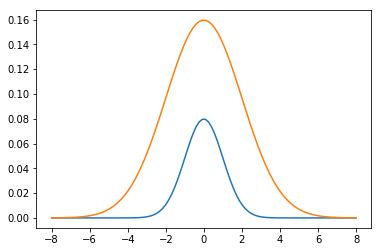

In [66]:
varmap(0.2)

The function returns nan for the intersection. 

### h)
Plot the weighted density functions using a logarithmic y-axis (using
    ```plt.semilogy```) when the probability of a random chosen chip being a
    low-noise amplifier is 0.2

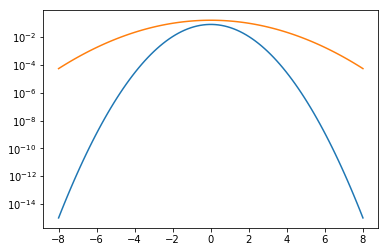

In [69]:
p_LNA=0.2
x=np.linspace(-8,8,100)

plt.semilogy(x,p_LNA*X.pdf(x))
plt.semilogy(x,(1-p_LNA)*Y.pdf(x))

The curves never actually intersect!

### i)
Show where the math breaks down when the probability of a random chosen chip being a low-noise amplifier is low
    


*See the separate PDF*